# Demo



## Do not print `storage_client.config`

This notebook will end up in github (o:

## This notebook will delete from your amazon, azure and local storage

Anything with a name that starts with "demos/" might get deleted.

In [1]:
#hide
#all_demo_test

In [2]:
from storage_tools.core import *
from pathlib import Path
from IPython.display import Image
import shutil

## You can run this notebook using ...

### Azure

To run this notebook you'll need read/write access to an azure blob store and have a `[azure_demo]` section configured in `secrets/settings.ini`.

Then set `storage_client=new_storage_client('azure_demo')` at the top of the next cell.

### AWS 

To run this notebook you'll need read/write access to an s3 bucket and have a `[aws_demo]` section configured in `secrets/settings.ini`.

Then set `storage_client=new_storage_client('aws_demo')` at the top of the next cell.

### or local storage

Just set `storage_client=new_storage_client('local_test','test/settings.ini')` at the top of the next cell.

In [3]:
# storage_client=new_storage_client('azure_demo')
# storage_client=new_storage_client('aws_demo')
storage_client=new_storage_client('local_test','test/settings.ini')

if isinstance(storage_client,AzureStorageClient):
    def clean_remote():
        for name in storage_client.ls(name_starts_with='demos/demo_'):
            storage_client.client.delete_blob(name)
        
elif isinstance(storage_client,AwsStorageClient):
    def clean_remote():
        for name in storage_client.ls(name_starts_with='demos/demo_'):
            storage_client.client.delete_object(Bucket=storage_client.config['bucket'],Key=name)
else:
    def clean_remote():
        try: shutil.rmtree(storage_client.config['storage_area']+'/demos')
        except FileNotFoundError: pass
    
print('Using',storage_client)
    
def clean_local():
    try: shutil.rmtree(storage_client.config['local_path']+'/demos')
    except FileNotFoundError: pass
    
clean_local()
clean_remote()

Using <storage_tools.core.LocalStorageClient object at 0x000001E30CB23C48>


Note: normally you would do something like `storage_client=new_storage_client('azure_demo')` to create a storage client. Feel free to ignore the extra code in the above cell - it handles data cleanup etc so that we can run the demo multiple times.

## The next 3 cells us `storage_client.ls` to see what's in both remote and local storage

In [4]:
storage_client.ls()

[]

In [5]:
storage_client.ls(name_starts_with='For')

[]

In [6]:
storage_client.ls('local_path')

[]

## Now we can create a dataset in local storage

In [7]:
dataset_name='demos/demo_0'
path=Path(storage_client.config['local_path'])/dataset_name
path.mkdir(parents=True)
for ext in ['txt','csv','png']:
    shutil.copyfile(f'test/test_data.{ext}',path/f'test_data.{ext}')

In [8]:
storage_client.ls('local_path',dataset_name)

['demos/demo_0/test_data.csv',
 'demos/demo_0/test_data.png',
 'demos/demo_0/test_data.txt']

## Upload the dataset and `storage_client.ls` to show it got uploaded

In [9]:
storage_client.upload_dataset(dataset_name)

WindowsPath('test/storage_area/demos/demo_0.0.0.1.zip')

In [10]:
storage_client.ls()

['demos/demo_0.0.0.1.zip']

## Delete our local copy then download from remote storage

In [11]:
clean_local()

In [12]:
local_dataset=storage_client.download_dataset(dataset_name)
local_dataset

WindowsPath('test/local_path/demos/demo_0.0.0.1')

## Display a file from the dataset

This image was uploaded to remote storage as part of the 'demos/demo_0' dataset then, downloaded from remote to local

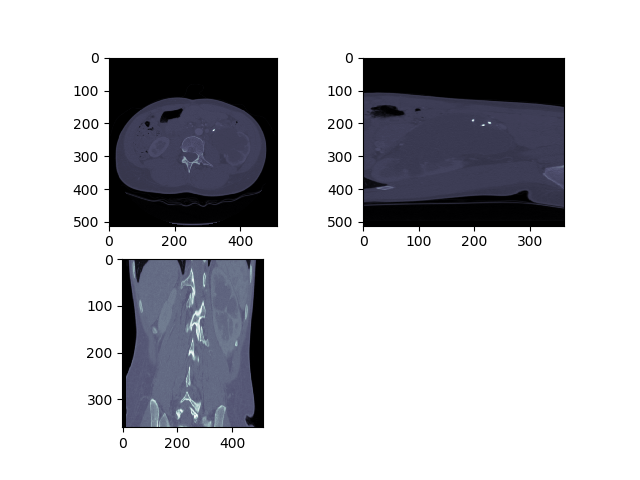

In [13]:
Image(filename=local_dataset/'test_data.png') 

## Clean-up local and remote files if you like

In [14]:
clean_local()
clean_remote()